# Binding Energy per Nucleon

We can explore and plot the binding energy per nucleon to understand when fusion and fission operate.

In [1]:
import pynucastro as pyna

First we'll get all nuclei with known masses and look at the binding energy

In [2]:
nuclei = pyna.get_all_nuclei()

In [3]:
len(nuclei)

3558

We see there are > 3500 nuclei with measured masses

## Most tightly bound nucleus

We can easily find the nucleus that is most tightly bound

In [4]:
nuc_bound = max(nuclei, key=lambda n : n.nucbind)
nuc_bound

Ni62

## Binding energy plot

Now we can make a plot of binding energy per nucleon for all nuclei

In [5]:
As = [n.A for n in nuclei]
BEs = [n.nucbind for n in nuclei]

In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'binding energy per nucleon (MeV)')

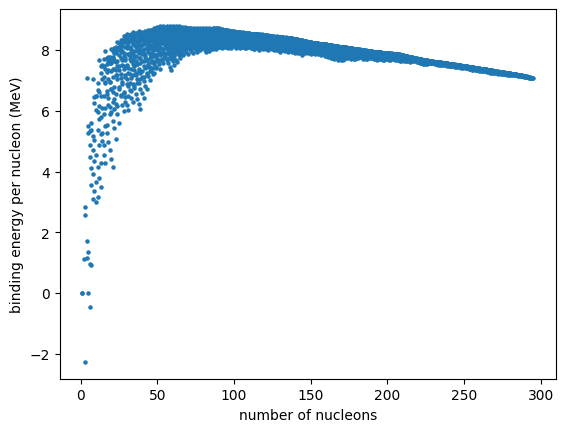

In [7]:
fig, ax = plt.subplots()
ax.scatter(As, BEs, s=5)
ax.set_xlabel("number of nucleons")
ax.set_ylabel("binding energy per nucleon (MeV)")

We see that there is quite a spread in binding energy for each nucleon count.

## Cleaner plot

We can instead consider only the most tightly bound nucleus at each mass number.  We will also
only consider those that are stable (or have half lives > 1 million years)

In [8]:
nuc = []

1 million years in seconds

In [9]:
million_years = 1.e6 * 365.25 * 24 * 3600

In [10]:
for A in range(1, max(As)+1):
    # for mass number A, find the nucleus with the maximum binding energy
    try:
        _new = max((n for n in nuclei
                    if n.A == A and (n.tau == "stable" or
                                     (n.tau is not None and n.tau > million_years))),
                   key=lambda q: q.nucbind)
    except ValueError:
        # no stable nucleus of this mass
        continue
    nuc.append(_new)

We now plot just these most tightly bound nuclei

In [11]:
As = [n.A for n in nuc]
BEs = [n.nucbind for n in nuc]

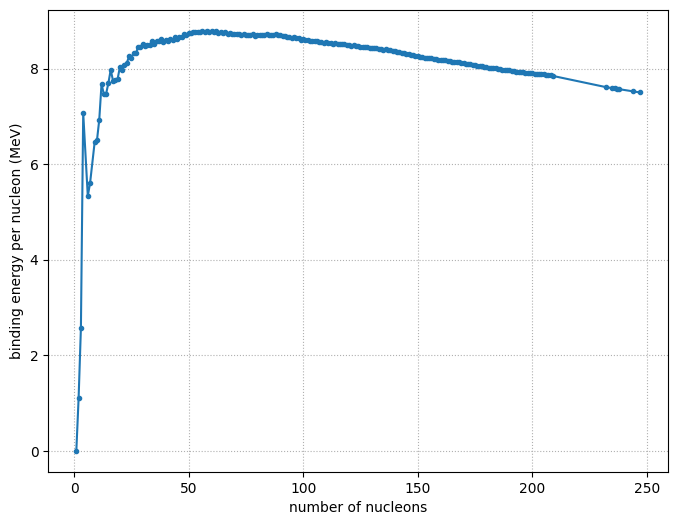

In [12]:
fig, ax = plt.subplots()
ax.plot(As, BEs, marker="o", markersize="3")
ax.set_xlabel("number of nucleons")
ax.set_ylabel("binding energy per nucleon (MeV)")
ax.grid(ls=":")
fig.set_size_inches((8, 6))